# FindDefault (Prediction of Credit Card fraud) - Capstone Project


## Problem Statement
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 



### Introduction:
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


In this Project, We have to build a classification model to predict whether a transaction is fraudulent or not. We will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.  Let's start!

### Project Outline:
- **Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
- **Data Cleaning:** This might include standardization, handling the missing values and outliers in the data. 
- **Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
- **Feature Engineering:** Create new features or transform the existing features for better performance of the ML Models. 
- **Model Selection:** Choose the most appropriate model that can be used for this project. 
- **Model Training:** Split the data into train & test sets and use the train set to estimate the best model parameters. 
- **Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting. 
- **Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment. 

#### Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

#### Understanding the data:

In [3]:
# Get the parent directory (project folder)
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Specify the path to the data file relative to the project folder
data_file_path = os.path.join(parent_directory, 'data', 'raw.csv')

# read the dataset
card_df = pd.read_csv(data_file_path)
card_df.head() # showing first 5 records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# showing last 5 records
card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# showing the shape of the dataset
card_df.shape

(284807, 31)

In [6]:
# showing columns in the dataset
card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

This dataset comprises 284,807 rows and 31 columns. Except for the 'Time' and 'Amount' columns, the nature of the remaining columns (V1 to V28) remains undisclosed due to privacy concerns. These undisclosed columns have undergone scaling and PCA transformation (dimensionality reduction technique).

### Exploratory Data Analysis:

#### Data Quality Check

In [7]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
card_df.isnull().values.any()

False

- As per the above info about the dataset, All the columns are of float datatype except the 'Class' which int in datatype.
- Notably, there are no missing values present in the dataset.

In [9]:
# checking the numerical columns description
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
# Checking the 'Class' column's values distribution
classes = card_df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
# Checking for the % distribution of Fraud and Non-frauds
classes_nf_share = classes[0]/card_df['Class'].count()*100
classes_f_share = classes[1]/card_df['Class'].count()*100
print("Percentage share of Non-fraud records: ", np.round(classes_nf_share,3))
print("Percentage share of Fraud records: ", np.round(classes_f_share,3))

Percentage share of Non-fraud records:  99.827
Percentage share of Fraud records:  0.173


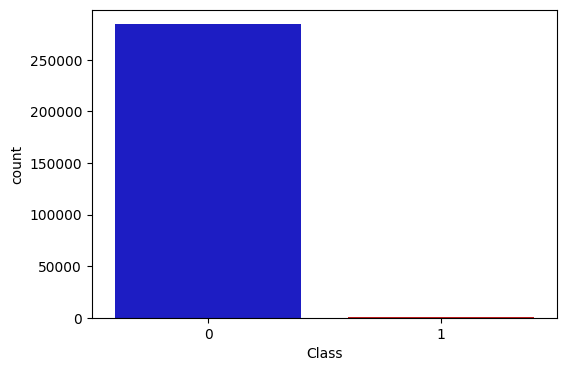

In [12]:
# Create Bar plot to show Fraudulent and Non-fraudulent distribution
plt.figure(figsize=(6,4))
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=card_df, x='Class', palette=colors)
plt.show()

Our dataset exhibits significant class imbalance, with the majority of transactions being non-fraudulent (99.82%). Using this dataset as the foundation for our predictive models and analysis may lead to substantial errors and overfitting. This is because the algorithms may incorrectly assume that most transactions are not fraudulent, compromising their ability to detect genuine fraud patterns. Instead, we aim for our model to discern distinctive patterns indicative of fraudulent activity rather than making assumptions based on class distribution. 

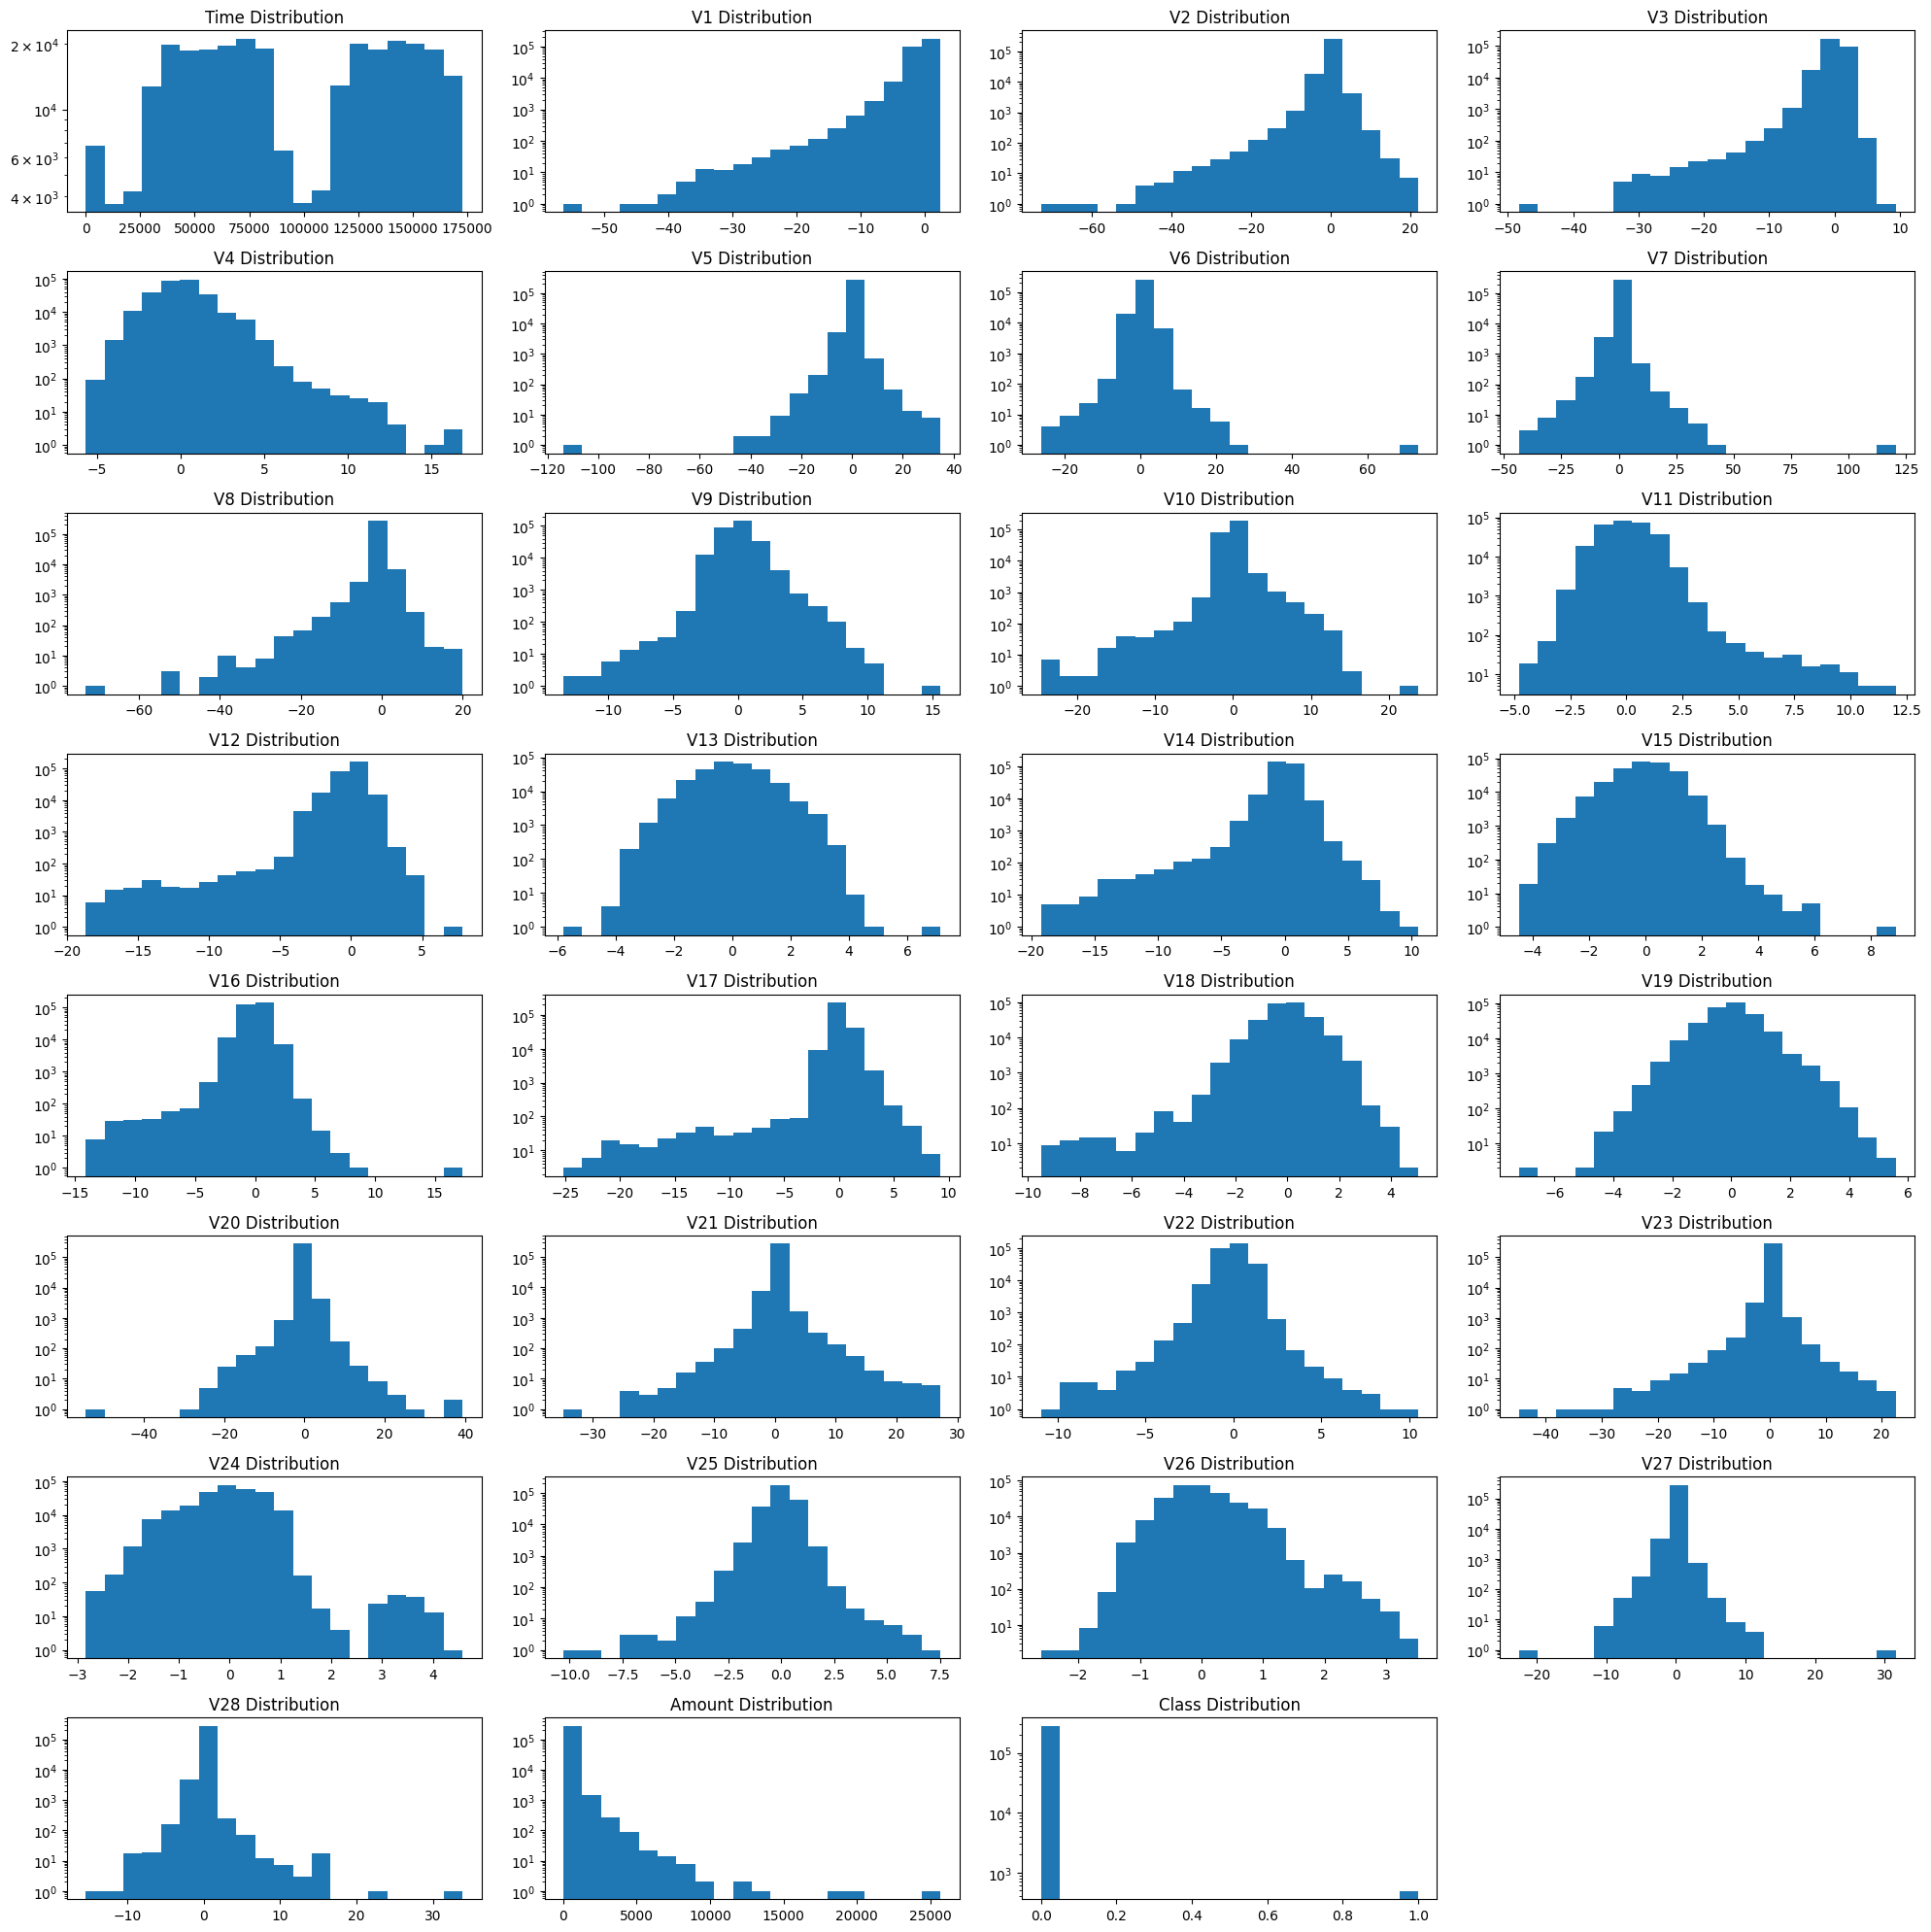

In [13]:
# plot the distribution for each features to check the skewness
def plot_histogram(dataset, features, nrows, ncols):
    fig = plt.figure(figsize = (20,20))
    for n, feature in enumerate(features):
        ax = fig.add_subplot(nrows, ncols, n+1)
        dataset[feature].hist(bins = 20, ax = ax, grid=False)
        ax.set_title(feature + ' Distribution')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

plot_histogram(card_df, card_df.columns, 8,4)

The columns labeled 'V1' to 'V28' have undergone transformation using PCA techniques, while the 'Class' column serves as the target variable. As a result, our primary focus will be on analyzing the 'Time' and 'Amount' columns.

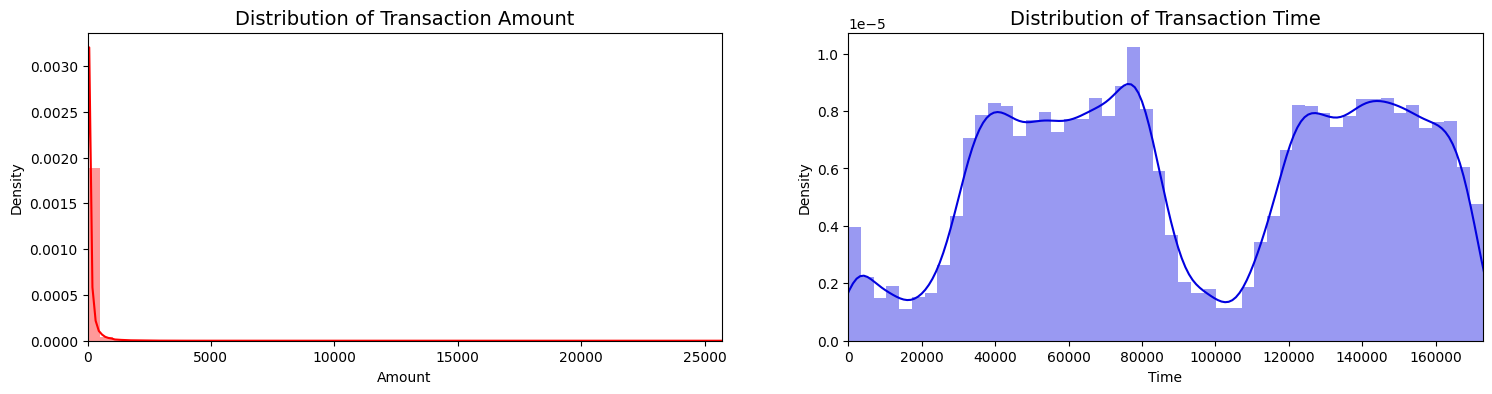

In [14]:
# Checking for the Distribution of Transaction Amount and Time
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(card_df.Amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(card_df.Amount), max(card_df.Amount)])

sns.distplot(card_df.Time, ax=ax[1], color="#0101DF")
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(card_df.Time), max(card_df.Time)])

plt.show()

Based on the distplots illustrating the distribution of Transaction Amount and Time, notable skewness is observed in both columns. The Transaction Amount feature exhibits a right-skewed distribution, indicating a higher frequency of smaller transactions with a tail extending towards larger values. As for the Time distribution, it illustrates transaction timings over a two-day period. Notably, transactions appear to be least frequent during nighttime and peak during daytime hours.

In [15]:
# differntiate dataset as per the Class labels 
fraudulent = card_df[card_df['Class']==1]
non_fraudulent = card_df[card_df['Class']==0]

In [16]:
## We need to analyze more amount of information from the transaction data for each Class
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
non_fraudulent.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

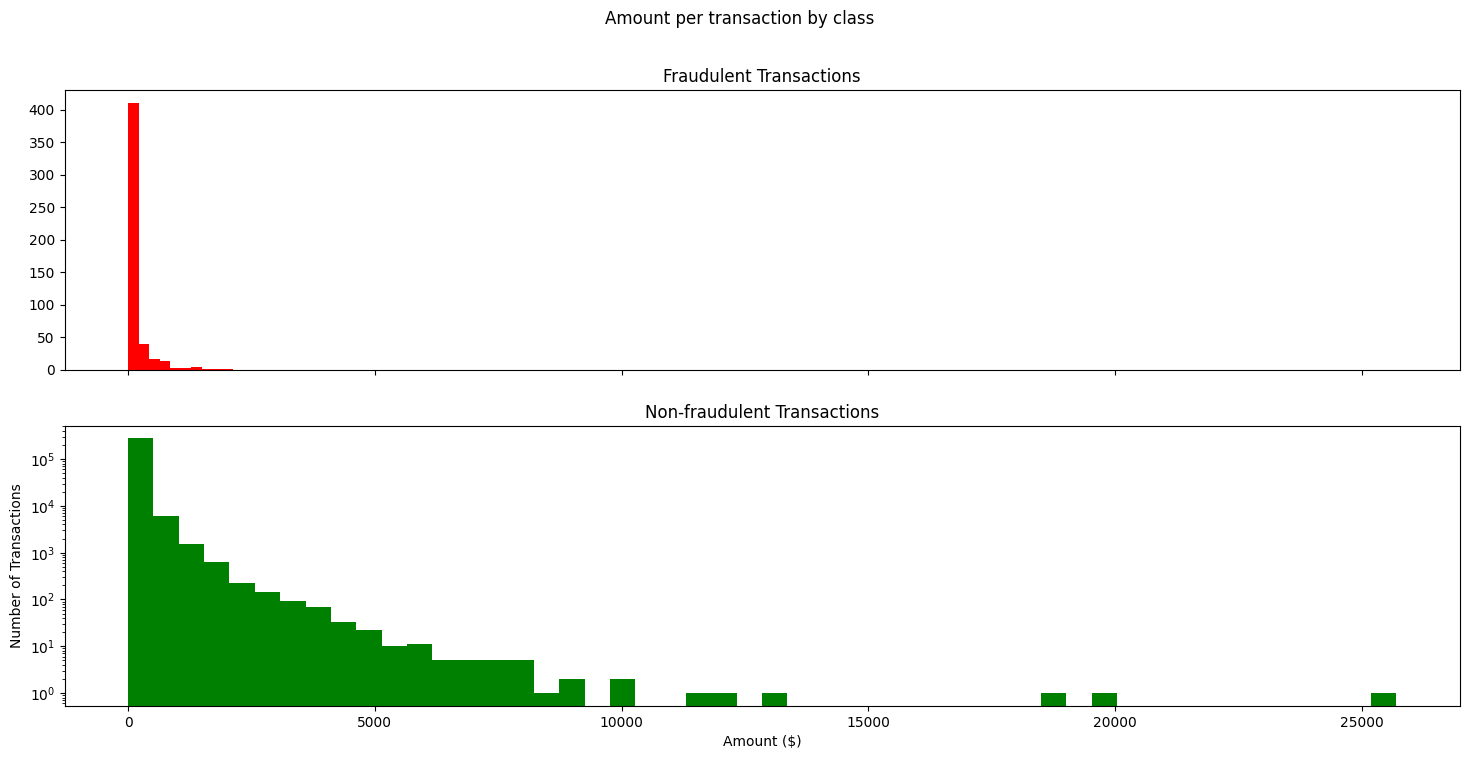

In [17]:
# plotting Amount distribution for Fraudulent and Non-fraudulent transactions
fig, ax = plt.subplots(2, 1, figsize = (18,8), sharex = True)
fig.suptitle('Amount per transaction by class')
ax[0].hist(fraudulent.Amount, color = 'red')
ax[0].set_title('Fraudulent Transactions')
ax[1].hist(non_fraudulent.Amount, bins = 50, color = 'green')
ax[1].set_title('Non-fraudulent Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Upon examining the distribution of fraudulent and non-fraudulent amounts, it becomes evident that the range of fraudulent amounts (0 to 2125) is narrower compared to non-fraudulent amounts (0 to 25691). Additionally, fraudulent amounts exhibit higher mean and standard deviation values.